In [1]:
#imports
import numpy as np
import pandas as pd
import final as fin
import warnings
warnings.filterwarnings("ignore")

# Goal
* Do a time series analysis on a country/city/state
* I will be looking at Thiruvananthapuram, India

# Preperation
    * Values were forward filled
    * Subset the data to only include Thiruvananthapuram
    * Did not drop any values

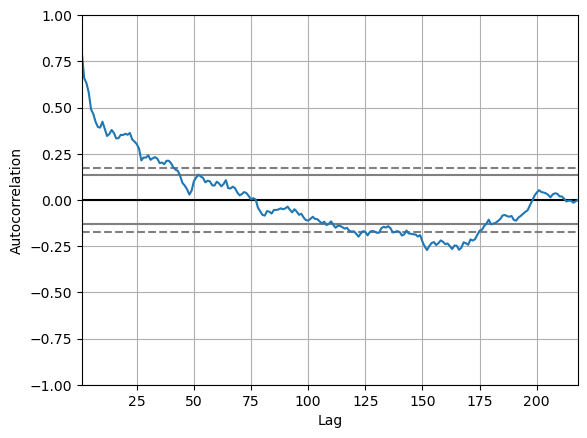

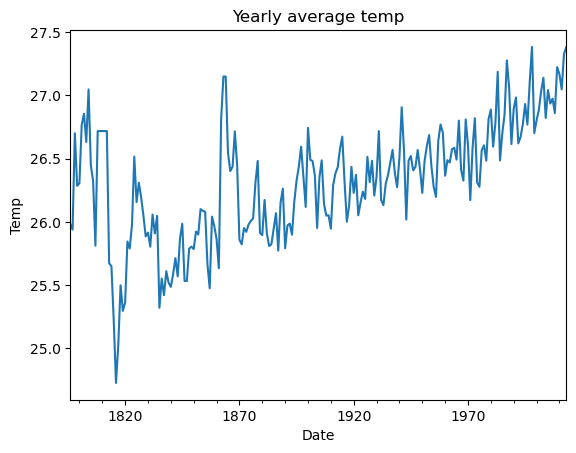

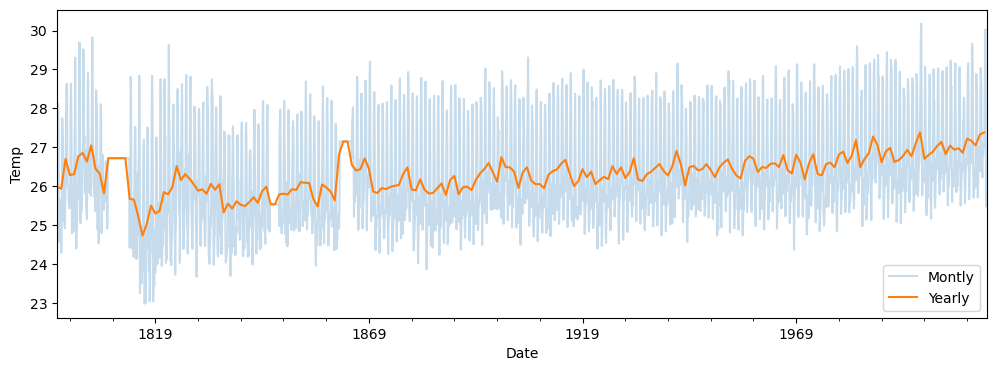

In [2]:
#Exlloration plots
fin.plots()

<div class="alert alert-info">
    <header>
    <h2>Exploration Takeaways</h2>
    </header>
    <dl>
        <dd>- Missing values were filled using a forward fill. There were a total of 129 values filled.</dd>
        <dd>- The trends appear to be seasonal, but not significant in variance from year to year.</dd>
        <dd>- Move forward into modeling with monthly resampling</dd>
        <dd>- Human split the data into roughly 70% train, 20% validate, and 10% test.</dd>
    </dl>
</div>

# Modeling

In [3]:
#split the data
train, val, test=fin.splitdata()

In [4]:
#a look at the data
train.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
dt,,,,,,
1796-01-01,26.022,2.211,Thiruvananthapuram,India,8.84N,77.03E
1796-02-01,26.681,1.389,Thiruvananthapuram,India,8.84N,77.03E
1796-03-01,27.107,2.333,Thiruvananthapuram,India,8.84N,77.03E
1796-04-01,28.119,1.663,Thiruvananthapuram,India,8.84N,77.03E
1796-05-01,27.759,1.275,Thiruvananthapuram,India,8.84N,77.03E


AverageTemperature -- RMSE: 1


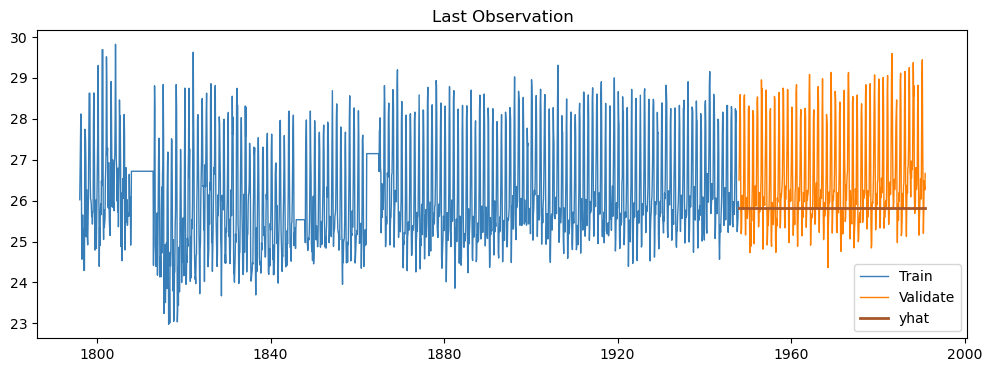

AverageTemperature -- RMSE: 1


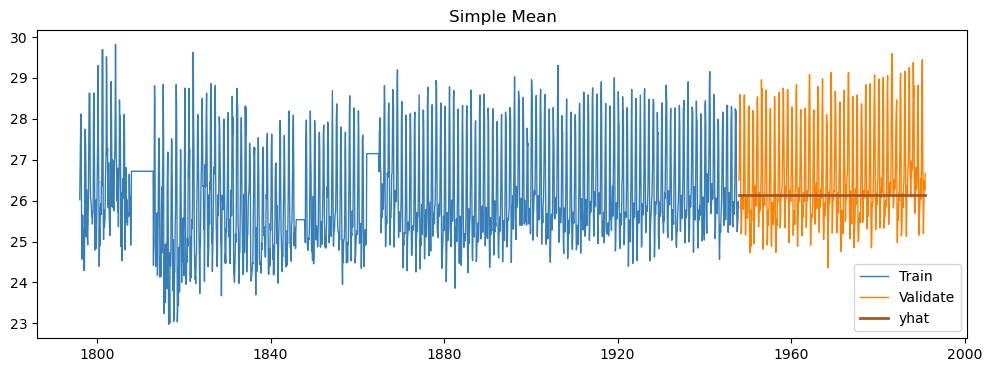

AverageTemperature -- RMSE: 1


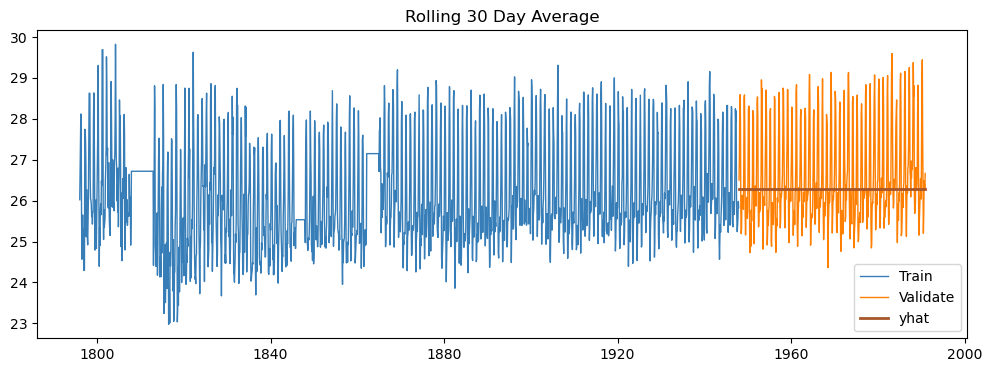

AverageTemperature -- RMSE: 1


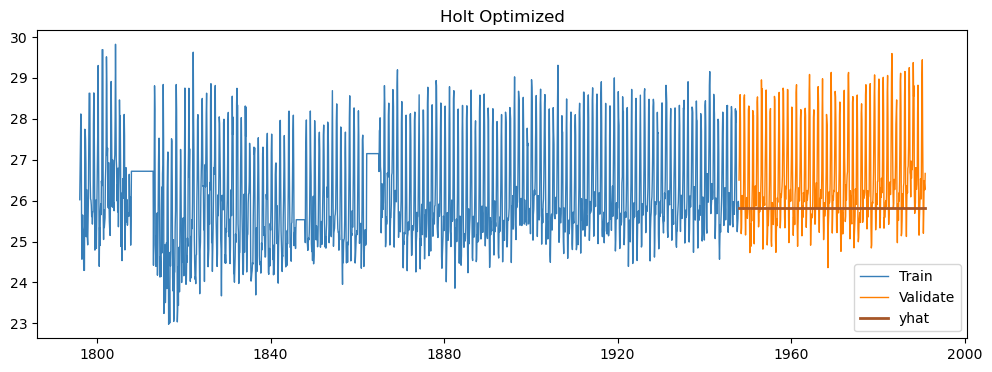

AverageTemperature -- RMSE: 2


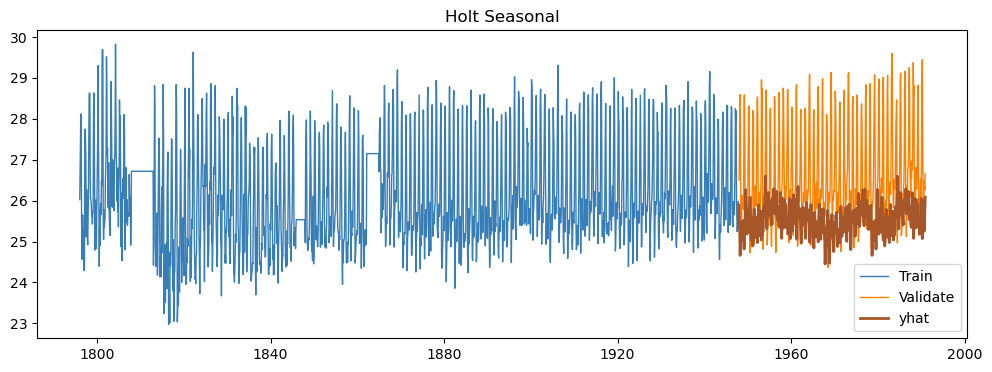

AverageTemperature -- RMSE: 0


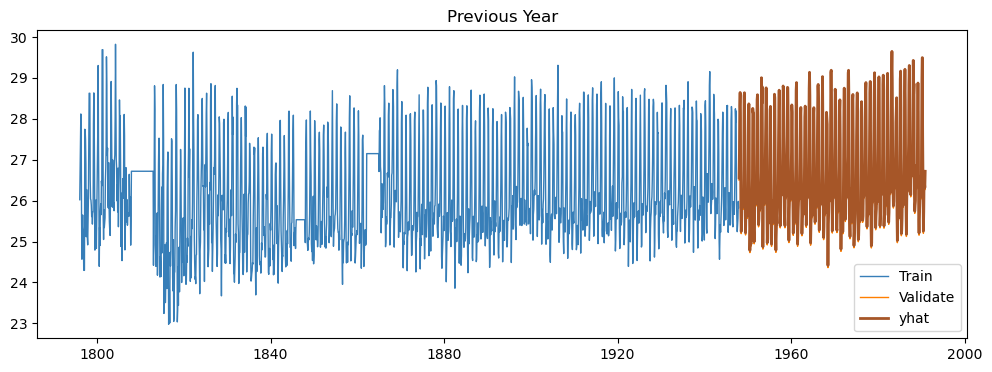

In [5]:
#plots of each model
eval_df=fin.modeling(train, val, 'AverageTemperature')

In [6]:
#model performance
eval_df

,model_type,target_var,rmse
5,previous_year,AverageTemperature,0.05327
2,rolling_avg,AverageTemperature,1.22559
1,simple_mean,AverageTemperature,1.27332
3,holts_optimized,AverageTemperature,1.41240
0,last_observed_value,AverageTemperature,1.41405
4,holts_seasonal,AverageTemperature,1.67716


<div class="alert alert-info">
    <header>
    <h2>Modeling Takeaways</h2>
    </header>
    <dl>
        <dd>- All models performed well with all rmse below 2.</dd>
        <dd>- The latitude for this city is 8.84 N, so it is very close to the equator. This could be why temperature averages are so similar compared year to year</dd>
        <dd>- Move forward with previous_year model for test data</dd>
    </dl>
</div>

# Test Data

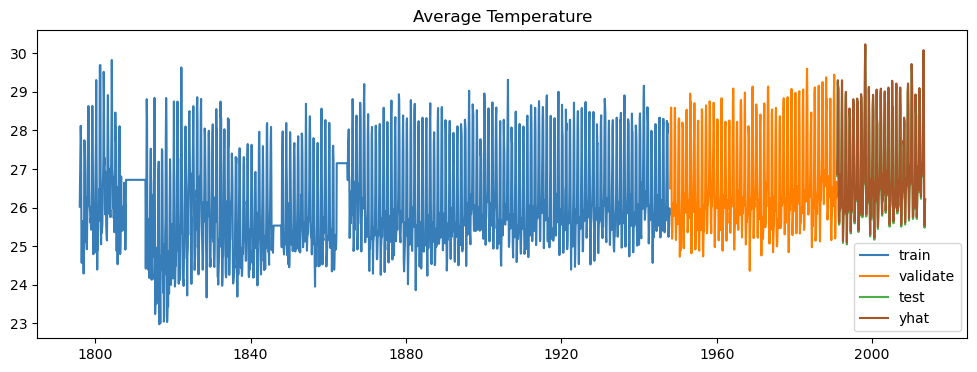

FINAL PERFORMANCE OF MODEL ON TEST DATA
rmse-average temperature: 0.05327484578478447


In [7]:
#test model and rmse
fin.test(train, val, test, 'AverageTemperature')

# 5 Year prediction

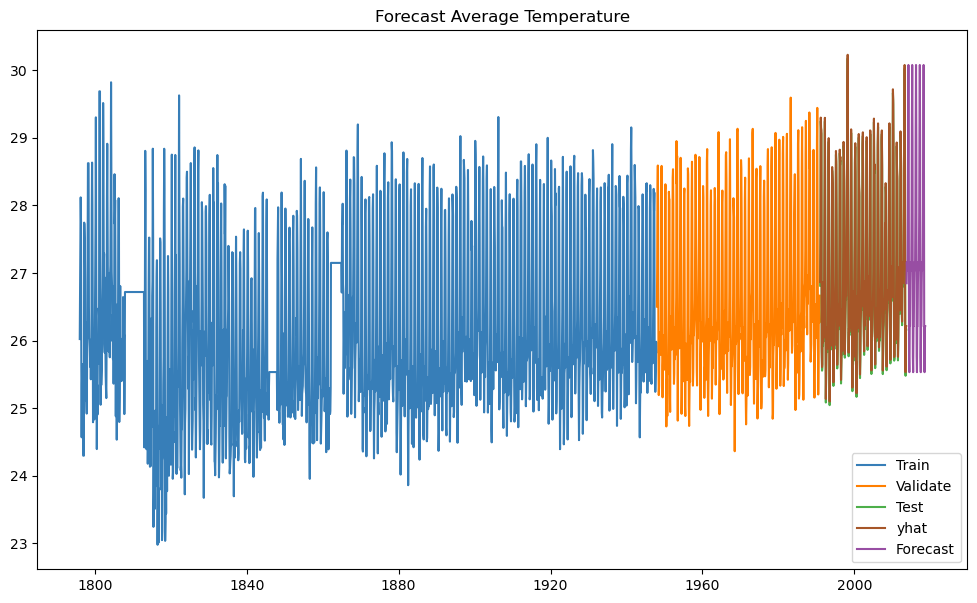

In [8]:
#forecast for 5 yrs
fin.forecast(train, val, test, 'AverageTemperature')

<div class="alert alert-info">
    <header>
    <h2>Conclusion</h2>
    </header>
    <dl>
        <dd>- The temperature averages from month to month are very similar.</dd>
        <dd>- The proximity to the equator could be a contributing factor to the consistent temps</dd>
        <dd>- Moving forward, I would like to do the same analysis for cities close to the equator and see if they show similar trends to this city.<dd>
    </dl>
</div>